In [1]:
!pip install pandas_datareader 

from pandas_datareader.data import DataReader 
from matplotlib import pyplot as plt
from matplotlib import style
import pandas as pd
from datetime import date 
import statistics

__________________________________________________________________________________________________________________

1. Code the strategy to capture the overnight returns for the Amazon and Apple stock

In [89]:
#extracting the stock price data for the year 2021
start = date(2021,1,1)
end = date(2021,12,30)

apple  = DataReader('AAPL', 'yahoo', start, end)
amazon = DataReader('AMZN','yahoo', start, end)

In [90]:
amazon.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,3282.919922,3241.199951,3275.00000,3256.929932,2957200,3256.929932
2021-01-04,3272.000000,3144.020020,3270.00000,3186.629883,4411400,3186.629883
2021-01-05,3223.379883,3165.060059,3166.01001,3218.510010,2655500,3218.510010
2021-01-06,3197.510010,3131.159912,3146.47998,3138.379883,4394800,3138.379883
2021-01-07,3208.540039,3155.000000,3157.00000,3162.159912,3514500,3162.159912


In [91]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.877014
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.617096
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.207306
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.824318
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.117844


In [92]:
#searching for null values and basic info regarding the data
amazon.info()
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-12-31 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-12-31 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [93]:
#converting to dataframe for easier handling 
amzn = pd.DataFrame(amazon)
apl = pd.DataFrame(apple)


In [94]:
#drop unwanted columns
amzn.drop(['High','Low','Volume','Adj Close'],axis = 1, inplace = True)
apl.drop(['High','Low','Volume','Adj Close'],axis = 1, inplace = True )

In [95]:
# calculate percentage change for daytime returns
def percent_chng(col1,col2):
    return ((col2 - col1) / col1) * 100

amzn['daytime returns %'] = percent_chng(amzn['Open'],amzn['Close'])    
apl['daytime returns %'] = percent_chng(apl['Open'],apl['Close'])    


In [96]:
## calculate percentage change for overnight returns
amzn['Overnight Return %'] = ((amzn['Open'].shift(-1) - amzn['Close']).shift(1)/amzn['Close'])*100
amzn['Overnight Return %'].shift(1)

apl['Overnight Return %'] = ((apl['Open'].shift(-1) - apl['Close']).shift(1)/apl['Close'])*100
apl['Overnight Return %'].shift(1)

Date
2020-12-31         NaN
2021-01-04         NaN
2021-01-05    0.641374
2021-01-06   -0.396920
2021-01-07   -2.598731
                ...   
2021-12-23    0.028460
2021-12-27    0.119132
2021-12-28    0.449175
2021-12-29   -0.094817
2021-12-30    0.022304
Name: Overnight Return %, Length: 252, dtype: float64

In [97]:
amzn

,Open,Close,daytime returns %,Overnight Return %
Date,,,,
2020-12-31,3275.000000,3256.929932,-0.551758,NaN
2021-01-04,3270.000000,3186.629883,-2.549545,0.410153
2021-01-05,3166.010010,3218.510010,1.658239,-0.640665
2021-01-06,3146.479980,3138.379883,-0.257434,-2.295134
2021-01-07,3157.000000,3162.159912,0.163444,0.588842
...,...,...,...,...
2021-12-23,3408.560059,3421.370117,0.375820,-0.355996
2021-12-27,3420.739990,3393.389893,-0.799537,-0.018569
2021-12-28,3403.649902,3413.219971,0.281171,0.300596


In [98]:
apl

,Open,Close,daytime returns %,Overnight Return %
Date,,,,
2020-12-31,134.080002,132.690002,-1.036694,NaN
2021-01-04,133.520004,129.410004,-3.078191,0.641374
2021-01-05,128.889999,131.009995,1.644810,-0.396920
2021-01-06,127.720001,126.599998,-0.876920,-2.598731
2021-01-07,128.360001,130.919998,1.994389,1.344334
...,...,...,...,...
2021-12-23,175.850006,176.279999,0.244522,0.119132
2021-12-27,177.089996,180.330002,1.829581,0.449175
2021-12-28,180.160004,179.289993,-0.482910,-0.094817


In [99]:
#fill NA values with 0
amzn['Overnight Return %'] = amzn['Overnight Return %'].fillna(0)

apl['Overnight Return %'] = apl['Overnight Return %'].fillna(0)

In [100]:
## adding 2 columns dataframe that can be used to show the volatility in returns
amzn_capital = appl_capital = 1000

amzn['Overnight return amount'] = (amzn_capital * amzn['Overnight Return %'])/100
amzn['daytime return amount'] = (amzn_capital * amzn['daytime returns %'])/100

apl['Overnight return amount'] = (appl_capital * apl['Overnight Return %'])/100
apl['daytime return amount'] = (appl_capital * apl['daytime returns %'])/100

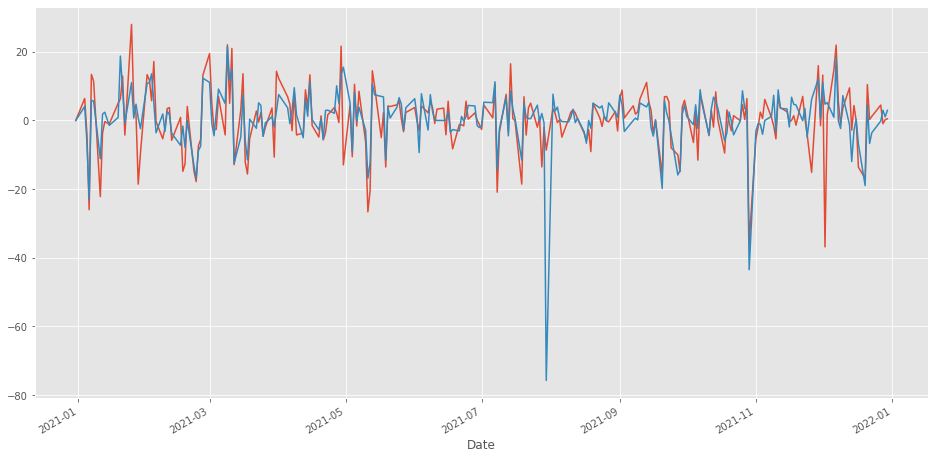

In [101]:
#plotting overnight returns 

style.use('ggplot')
apl['Overnight return amount'].plot(figsize=(16,8), label ='Overnight return amount' )
amzn['Overnight return amount'].plot(figsize=(16,8), label ='Overnight return amount' )
plt.show()

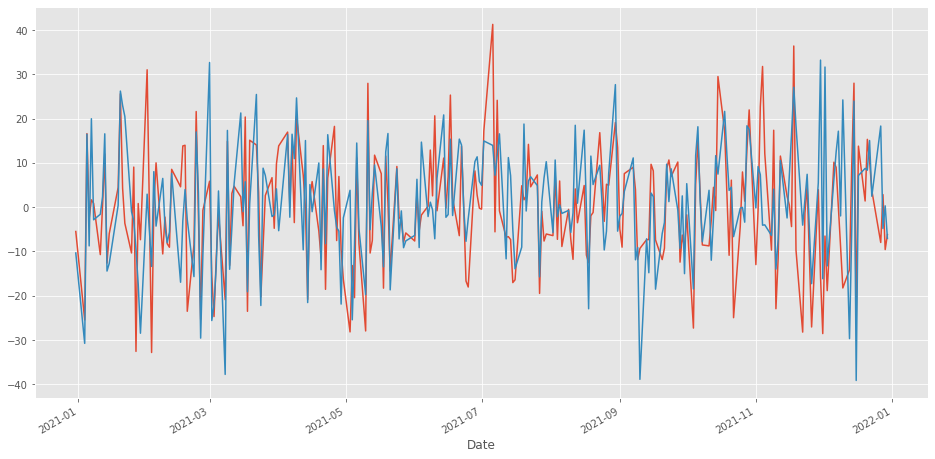

In [102]:
#plotting daytime returns
style.use('ggplot')
amzn['daytime return amount'].plot(figsize=(16,8), label ='daytime return amount' )
apl['daytime return amount'].plot(figsize=(16,8), label ='daytime return amount' )

plt.show()

Allocate an equal amount of capital to both Amazon and Apple & Plot the strategy returns


.

In [103]:
#cumulative P&L and storing values in a list for apple overnight 
apl_capital = 1000
apl_overnight=[]
apl_profit = 0
for i in range(1,252):
    apl_pnl =  (apl['Overnight Return %'][i]/100)*apl_capital
    apl_profit = apl_profit + apl_pnl
    apl_overnight.append(apl_profit)

In [104]:
sum(apl_overnight)

14682.989567900837

In [105]:
#cumulative P&L and storing values in a list for apple daytime 

apl_capital = 1000
apl_daytime=[]
apl_profit = 0
for i in range(1,252):
    apl_pnl =  (apl['daytime returns %'][i]/100)*apl_capital
    apl_profit = apl_profit + apl_pnl
    apl_daytime.append(apl_profit)

In [106]:
sum(apl_daytime)


66.65230628234642

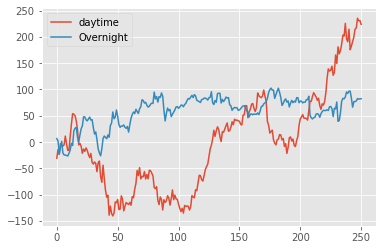

In [107]:
# Plotting daytime and nightime P&L cumulative for apple
plt.plot(apl_daytime, label = "daytime")
plt.plot(apl_overnight, label = "Overnight")
plt.legend()
plt.show()


In [108]:
#cumulative P&L and storing values in a list for amazon overnight
amzn_capital = 1000
amzn_overnight=[]
amzn_profit = 0
for i in range(1,252):
    amzn_pnl =  (amzn['Overnight Return %'][i]/100)*amzn_capital
    amzn_profit = amzn_profit + amzn_pnl
    amzn_overnight.append(amzn_profit)

In [109]:
sum(amzn_overnight)

28583.215780173643

In [110]:
#cumulative P&L and storing values in a list for amazon daytime
amzn_capital = 1000
amzn_daytime=[]
amzn_profit = 0
for i in range(1,252):
    amzn_pnl =  (amzn['daytime returns %'][i]/100)*amzn_capital
    amzn_profit = amzn_profit + amzn_pnl
    amzn_daytime.append(amzn_profit)

In [111]:
sum(amzn_daytime)

-20473.900717355264

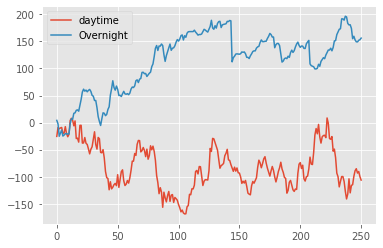

In [112]:
# Plotting daytime and nightime P&L cumulative for Amazon
plt.plot(amzn_daytime, label = "daytime")
plt.plot(amzn_overnight, label = "Overnight")
plt.legend()
plt.show()


In [3]:
#defining function to calculate average 
def Average(lst):
    return sum(lst) / len(lst)



Sharpe ratio calculation for all

In [114]:

Sharpe_Ratio_apl_daytime = Average(apl_daytime)/ statistics.pstdev(apl_daytime)
Sharpe_Ratio_apl_daytime

0.00284524107568446

In [115]:
Sharpe_Ratio_apl_overnight = Average(apl_overnight)/ statistics.pstdev(apl_overnight)
Sharpe_Ratio_apl_overnight

1.9822279588242753

In [116]:
Sharpe_Ratio_amzn_daytime = Average(amzn_daytime)/ statistics.pstdev(amzn_daytime)
Sharpe_Ratio_amzn_daytime

-1.9816141552587418

In [117]:
Sharpe_Ratio_amzn_overnight = Average(amzn_overnight)/ statistics.pstdev(amzn_overnight)
Sharpe_Ratio_amzn_overnight

2.0208347833101614

In [118]:
amzn

,Open,Close,daytime returns %,Overnight Return %,Overnight return amount,daytime return amount
Date,,,,,,
2020-12-31,3275.000000,3256.929932,-0.551758,0.000000,0.000000,-5.517578
2021-01-04,3270.000000,3186.629883,-2.549545,0.410153,4.101533,-25.495449
2021-01-05,3166.010010,3218.510010,1.658239,-0.640665,-6.406652,16.582386
2021-01-06,3146.479980,3138.379883,-0.257434,-2.295134,-22.951342,-2.574336
2021-01-07,3157.000000,3162.159912,0.163444,0.588842,5.888417,1.634435
...,...,...,...,...,...,...
2021-12-23,3408.560059,3421.370117,0.375820,-0.355996,-3.559957,3.758202
2021-12-27,3420.739990,3393.389893,-0.799537,-0.018569,-0.185692,-7.995375
2021-12-28,3403.649902,3413.219971,0.281171,0.300596,3.005962,2.811708


In [119]:
apl

,Open,Close,daytime returns %,Overnight Return %,Overnight return amount,daytime return amount
Date,,,,,,
2020-12-31,134.080002,132.690002,-1.036694,0.000000,0.000000,-10.366940
2021-01-04,133.520004,129.410004,-3.078191,0.641374,6.413738,-30.781909
2021-01-05,128.889999,131.009995,1.644810,-0.396920,-3.969195,16.448096
2021-01-06,127.720001,126.599998,-0.876920,-2.598731,-25.987309,-8.769204
2021-01-07,128.360001,130.919998,1.994389,1.344334,13.443341,19.943889
...,...,...,...,...,...,...
2021-12-23,175.850006,176.279999,0.244522,0.119132,1.191325,2.445224
2021-12-27,177.089996,180.330002,1.829581,0.449175,4.491752,18.295813
2021-12-28,180.160004,179.289993,-0.482910,-0.094817,-0.948174,-4.829098
